# Common Enzyme Network Graph Visualization

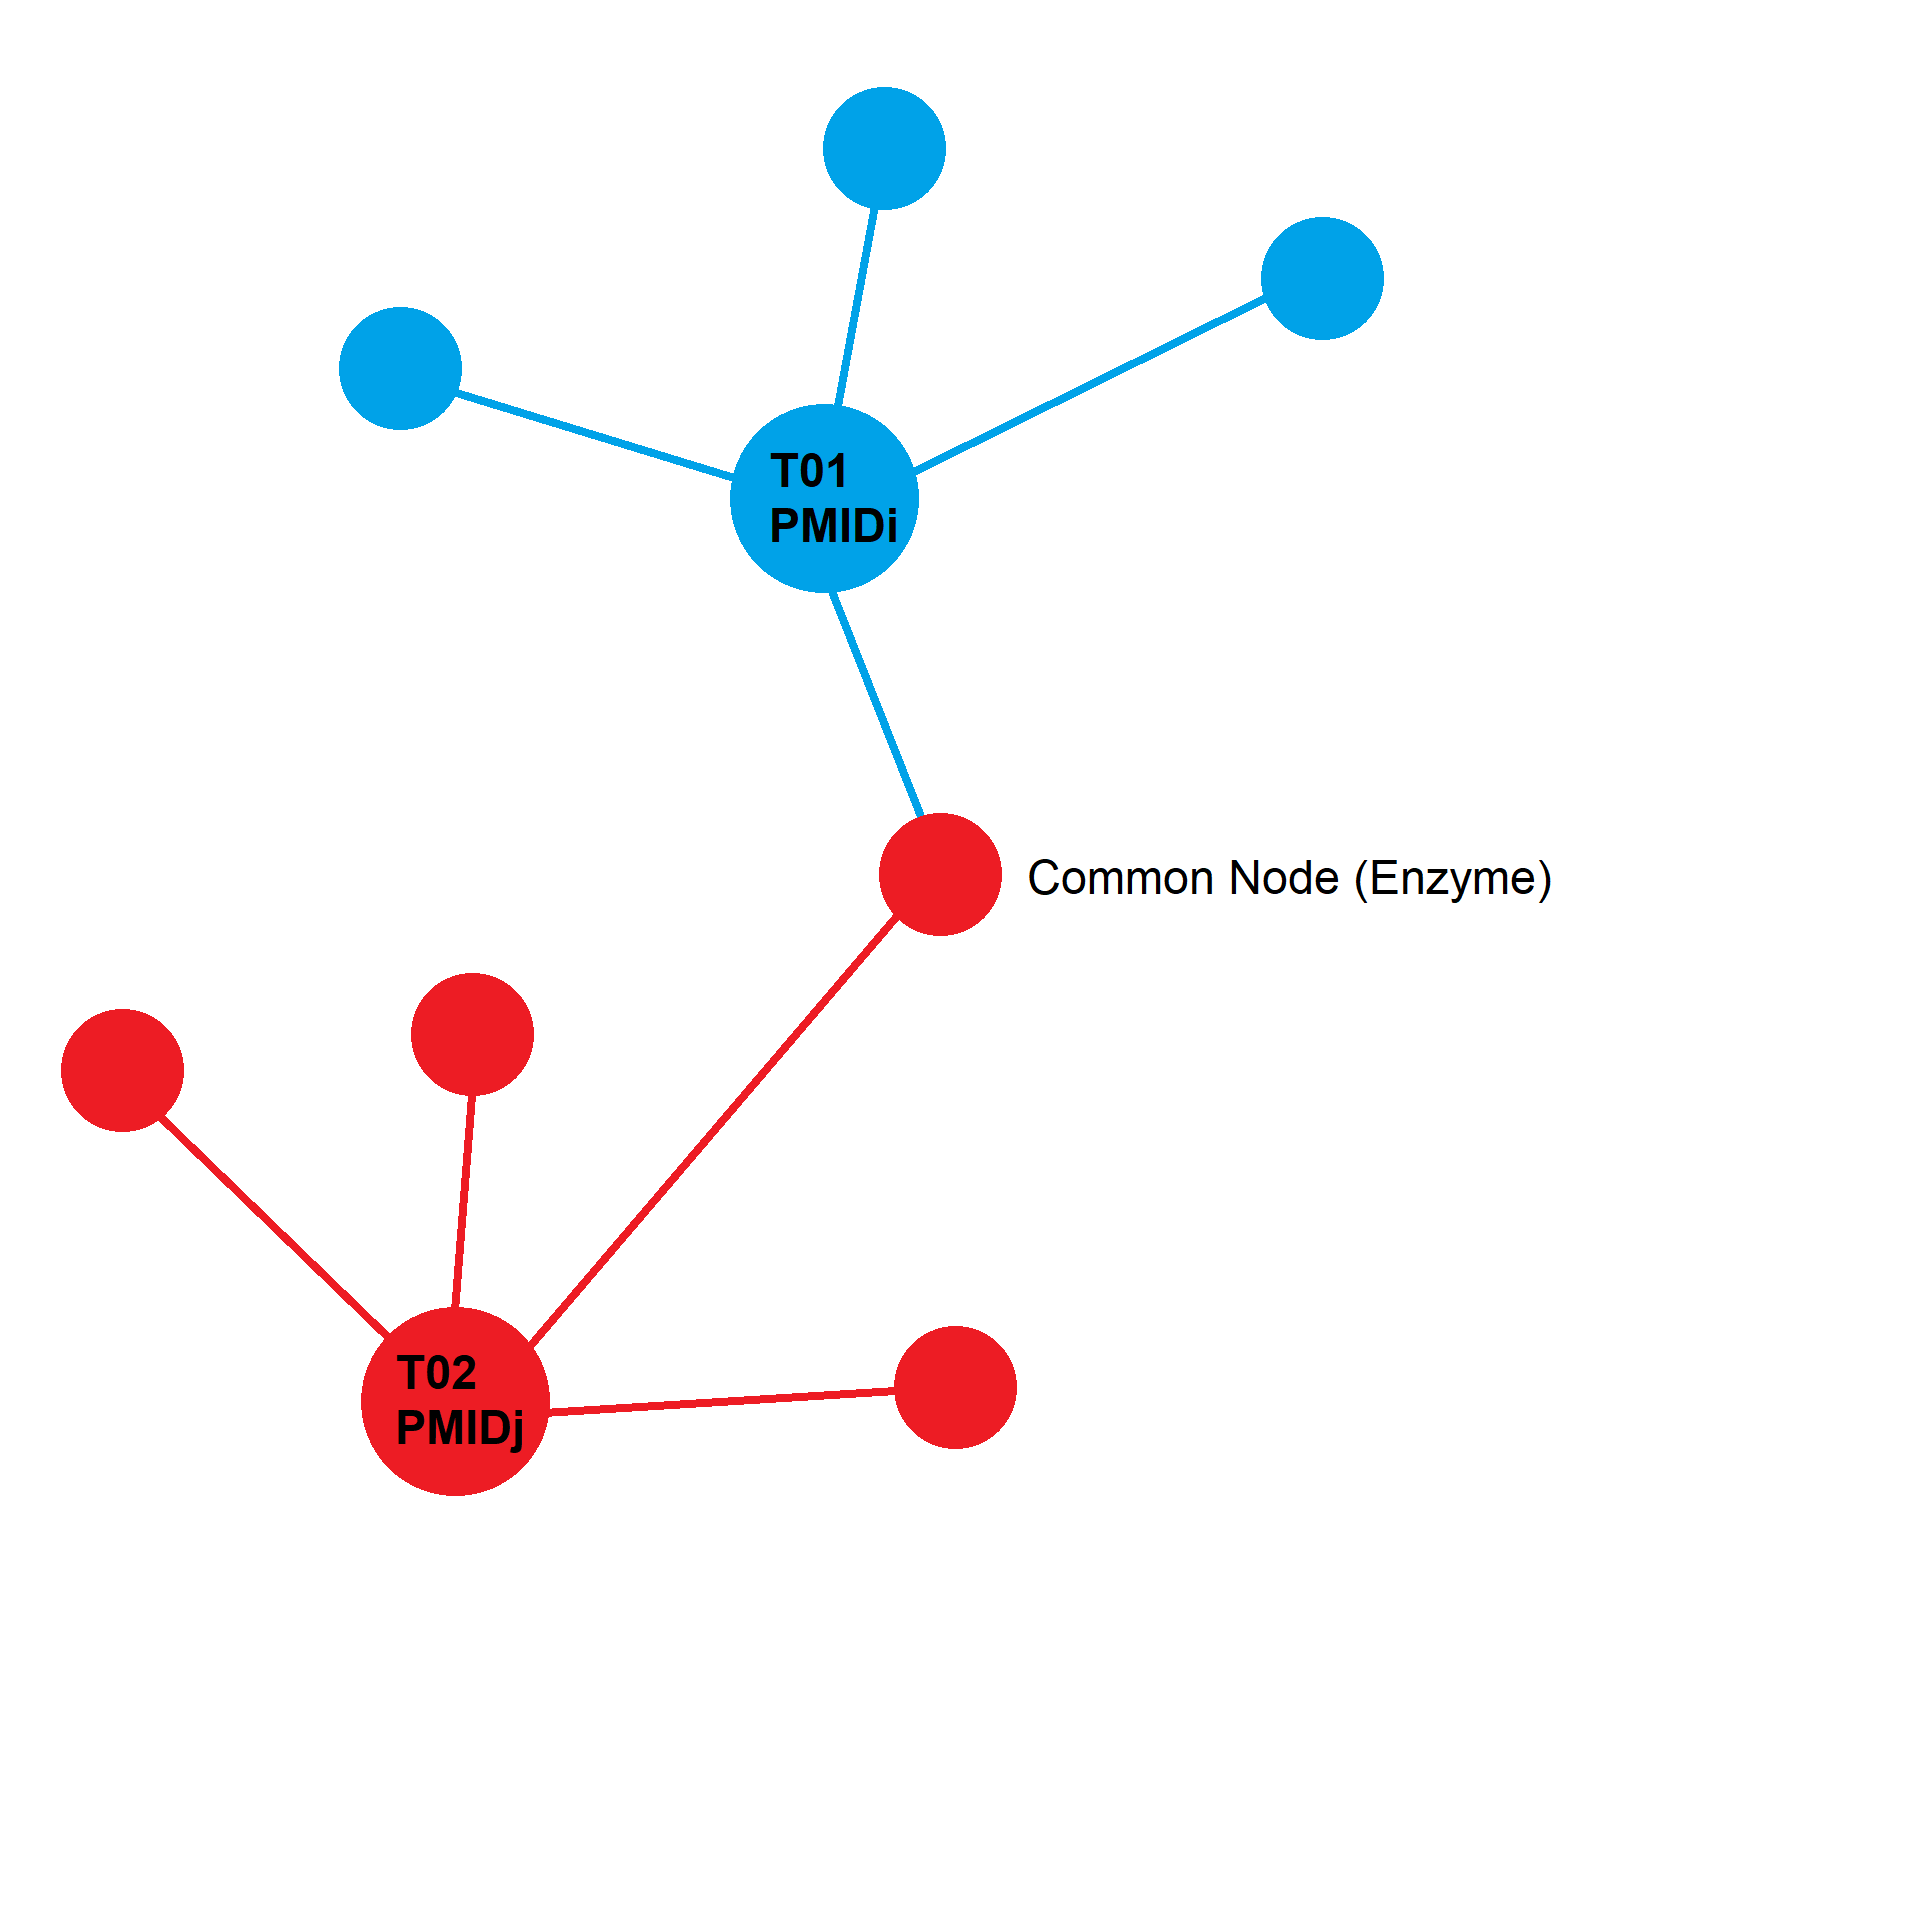

In [ ]:
from IPython import display
display.Image("https://i.imgur.com/XGzWVTY.png")

## Libraries

In [ ]:
! pip install -q biopython
! pip install -q pyvis

     |████████████████████████████████| 2.3 MB 9.7 MB/s 


In [ ]:
# Fetching PubMed article metadata
from Bio import Entrez, Medline

# Graph creation and visualisation
from pyvis.network import Network
import networkx as nx 

import time
from tqdm import tqdm
import os 
from operator import itemgetter

# data handling
import pandas as pd
import numpy as np

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [ ]:
starttime = time.time()

## Helper Code

In [ ]:
def process_pmid_txt(text_file_path):

  pmids = list()

  f = open(text_file_path, "r")

  for pmid in f.read().split('\n'):
    pmids.append(pmid.strip())  
  
  f.close()
  
  return pmids

In [ ]:
def fetch_data(pmids):
    """Returns MEDLINE/pubmed record associated with the PMID(s)"""
    
    Entrez.email = 'akishirsath@gmail.com'

    handle = Entrez.efetch(db="pubmed", 
                           id=pmids, 
                           rettype="medline", 
                           retmode="text")

    records = Medline.parse(handle)    
    
    return list(records)

In [ ]:
directory_path = "/content/drive/MyDrive/05-Data/PubMed-Common-Enzymes/"

In [ ]:
'''all_pmids = dict()

for file_name in os.listdir(directory_path):
  sub_name = file_name.split('-')[1]
  file_path = os.path.join(directory_path, file_name)
  all_pmids[sub_name] = process_pmid_txt(file_path)'''

"all_pmids = dict()\n\nfor file_name in os.listdir(directory_path):\n  sub_name = file_name.split('-')[1]\n  file_path = os.path.join(directory_path, file_name)\n  all_pmids[sub_name] = process_pmid_txt(file_path)"

In [ ]:
# all_pmids.keys()

In [ ]:
# all_pmids

## Fetching the records

In [ ]:
## Sample

cancer_file_path = "/content/drive/MyDrive/05-Data/PubMed-Common-Enzymes/pmid-Cancer-set.txt"

cancer_pmids = process_pmid_txt(cancer_file_path)

cancer_data = fetch_data(",".join(cancer_pmids))

time.sleep(10)

In [ ]:
sarscov_file_path = "/content/drive/MyDrive/05-Data/PubMed-Common-Enzymes/pmid-sarscov2-set.txt"

sarscov_pmids = process_pmid_txt(sarscov_file_path)

sarscov_data = fetch_data(",".join(sarscov_pmids))

In [ ]:
len(sarscov_data)

10000

In [ ]:
enzyme_classes = {
    '1':'Oxidoreductases',
    '2':'Transferases',
    '3':'Hydrolases',
    '4':'Lyases',
    '5':'Isomerases',
    '6':'Ligases',
    '7':'Translocases',
}

In [ ]:
G = nx.Graph()

for record in cancer_data:
  substances = record.get('RN', "NONE")
  if substances != "NONE":
    for molecule in substances:
      if molecule.startswith('EC'):
        # Primary PMID node
        main_node = str(record.get('PMID', "NONE")).strip()
        G.add_node(main_node)
        # Secondary Enzyme node
        G.add_node(molecule)
        G.add_edge(main_node, molecule)


for record in sarscov_data:
  substances = record.get('RN', "NONE")
  if substances != "NONE":
    for molecule in substances:
      if molecule.startswith('EC'):
        # Primary PMID node
        main_node = str(record.get('PMID', "NONE")).strip()
        G.add_node(main_node)
        # Secondary Enzyme node
        G.add_node(molecule)
        G.add_edge(main_node, molecule)

In [ ]:
G.number_of_nodes()

2526

In [ ]:
G.number_of_edges()

3503

### Shape Of The Network

In [ ]:
G.number_of_nodes()

2526

In [ ]:
G.number_of_edges()

3503

In [ ]:
density = nx.density(G)
print("Network density:", round(density, 6))

Network density: 0.001098


### Centrality

In [ ]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

In [ ]:
len(sorted_degree)

2526

In [ ]:
sorted_degree[0:10]

[('EC 3.4.17.23 (Angiotensin-Converting Enzyme 2)', 554),
 ('EC 3.4.17.23 (ACE2 protein, human)', 407),
 ('EC 3.4.22.28 (Coronavirus 3C Proteases)', 176),
 ('EC 3.4.22.- (3C-like proteinase, SARS-CoV-2)', 95),
 ('EC 3.4.21.- (Serine Endopeptidases)', 89),
 ('EC 3.4.21.- (TMPRSS2 protein, human)', 78),
 ('EC 2.7.7.48 (RNA-Dependent RNA Polymerase)', 71),
 ('EC 2.7.7.48 (Coronavirus RNA-Dependent RNA Polymerase)', 61),
 ('EC 3.4.- (Peptide Hydrolases)', 59),
 ('EC 3.4.15.1 (Peptidyl-Dipeptidase A)', 44)]

## Plotting Top MeSH Terms (Nodes) Among 146,985 Terms (Nodes) By Degree

### Top 50 Nodes

In [ ]:
top = 50
print(f"Top {top} nodes by degree:")
for d in sorted_degree[:top]:
    print(d)

Top 50 nodes by degree:
('EC 3.4.17.23 (Angiotensin-Converting Enzyme 2)', 554)
('EC 3.4.17.23 (ACE2 protein, human)', 407)
('EC 3.4.22.28 (Coronavirus 3C Proteases)', 176)
('EC 3.4.22.- (3C-like proteinase, SARS-CoV-2)', 95)
('EC 3.4.21.- (Serine Endopeptidases)', 89)
('EC 3.4.21.- (TMPRSS2 protein, human)', 78)
('EC 2.7.7.48 (RNA-Dependent RNA Polymerase)', 71)
('EC 2.7.7.48 (Coronavirus RNA-Dependent RNA Polymerase)', 61)
('EC 3.4.- (Peptide Hydrolases)', 59)
('EC 3.4.15.1 (Peptidyl-Dipeptidase A)', 44)
('EC 2.7.7.49 (Telomerase)', 39)
('EC 3.4.21.75 (Furin)', 36)
('EC 2.7.7.48 (NSP12 protein, SARS-CoV-2)', 35)
('EC 3.4.22.2 (Coronavirus Papain-Like Proteases)', 31)
('EC 2.7.10.1 (ErbB Receptors)', 24)
('EC 3.4.22.2 (papain-like protease, SARS-CoV-2)', 24)
('EC 3.4.22.- (3C-like protease, SARS coronavirus)', 22)
('EC 2.7.10.1 (Receptor, ErbB-2)', 21)
('EC 2.7.11.1 (Protein Serine-Threonine Kinases)', 20)
('EC 2.1.1.- (Methyltransferases)', 20)
('EC 1.14.99.1 (Cyclooxygenase 2)', 19)

### Top 30 Nodes Plot

Text(0, 0.5, 'Degree')

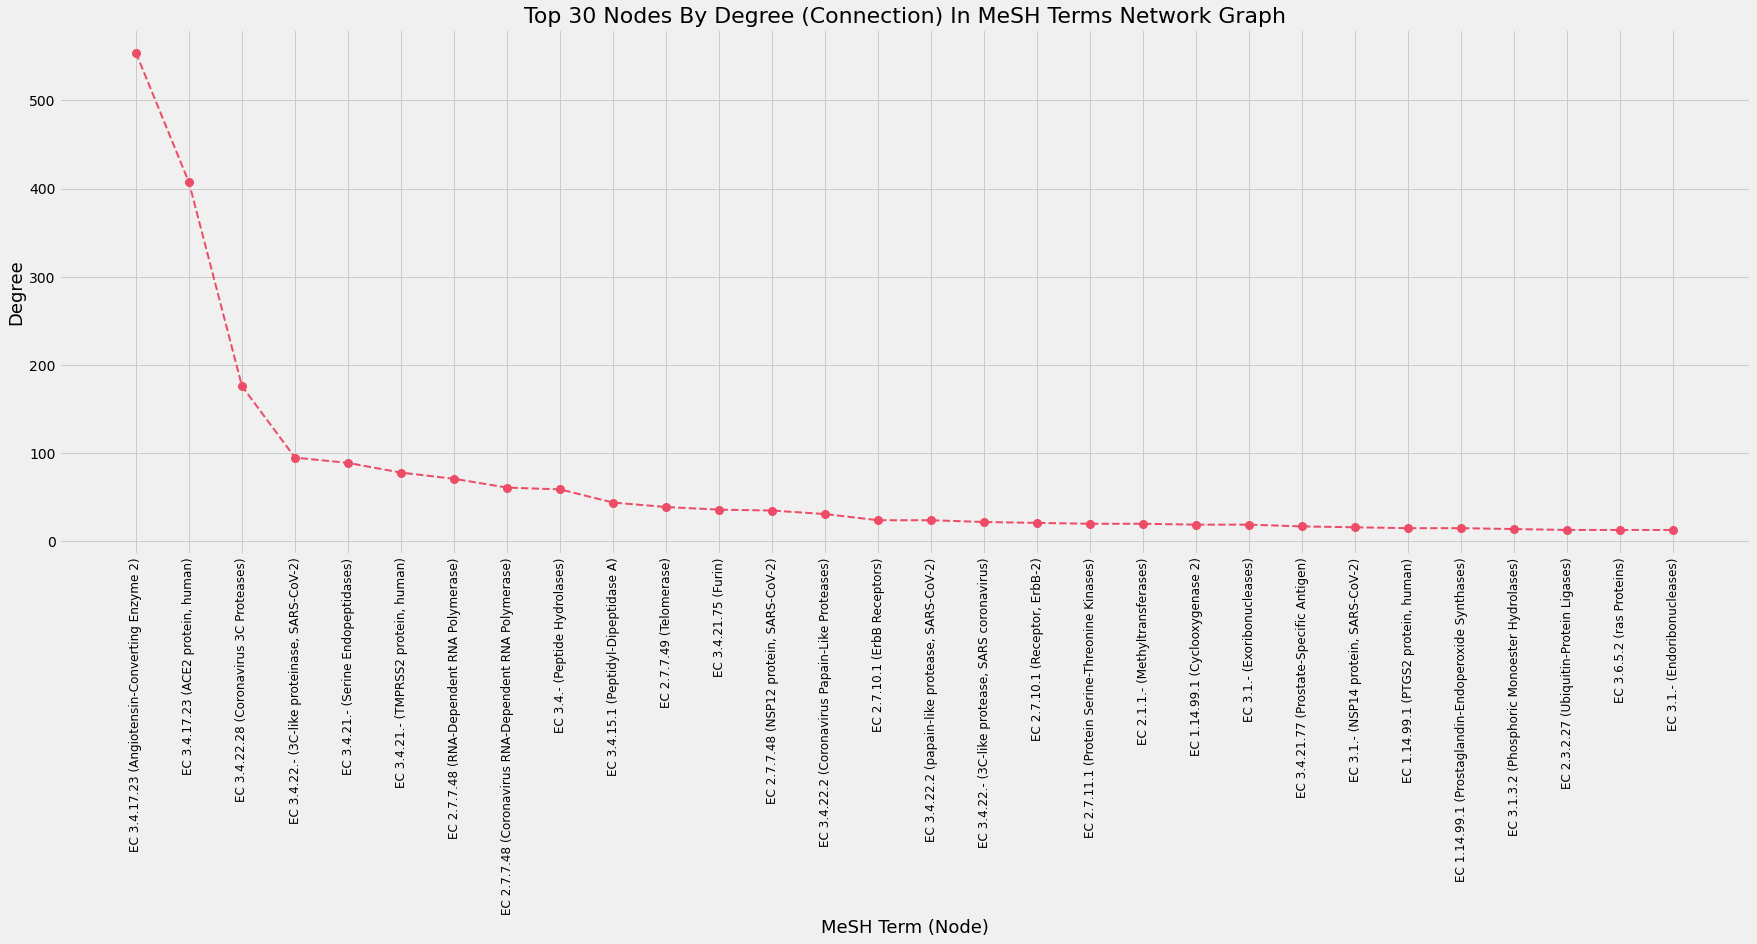

In [ ]:
top = 30
top_nodes = sorted_degree[:top]

mesh_nodes = list()
degrees = list()

for mesh_node, degree in top_nodes:
  mesh_nodes.append(mesh_node)
  degrees.append(degree)

title_ = f"Top {top} Nodes By Degree (Connection) In MeSH Terms Network Graph"

plt.rcParams['figure.figsize'] = [27, 9]

plt.xticks(rotation=90)

plt.plot(mesh_nodes, degrees, color='#ED4C67', 
         marker='o', linestyle='dashed', 
         linewidth=2, markersize=8)

#plt.suptitle(f"Based on {mesh_entries} Sars CoV-2 PubMed Articles Meta-data", fontsize=14)

plt.title(title_, fontsize=22)

plt.xticks(fontsize=12) 

plt.xlabel('MeSH Term (Node)', fontsize=18)

plt.ylabel('Degree', fontsize=18)

### Marker Annotation

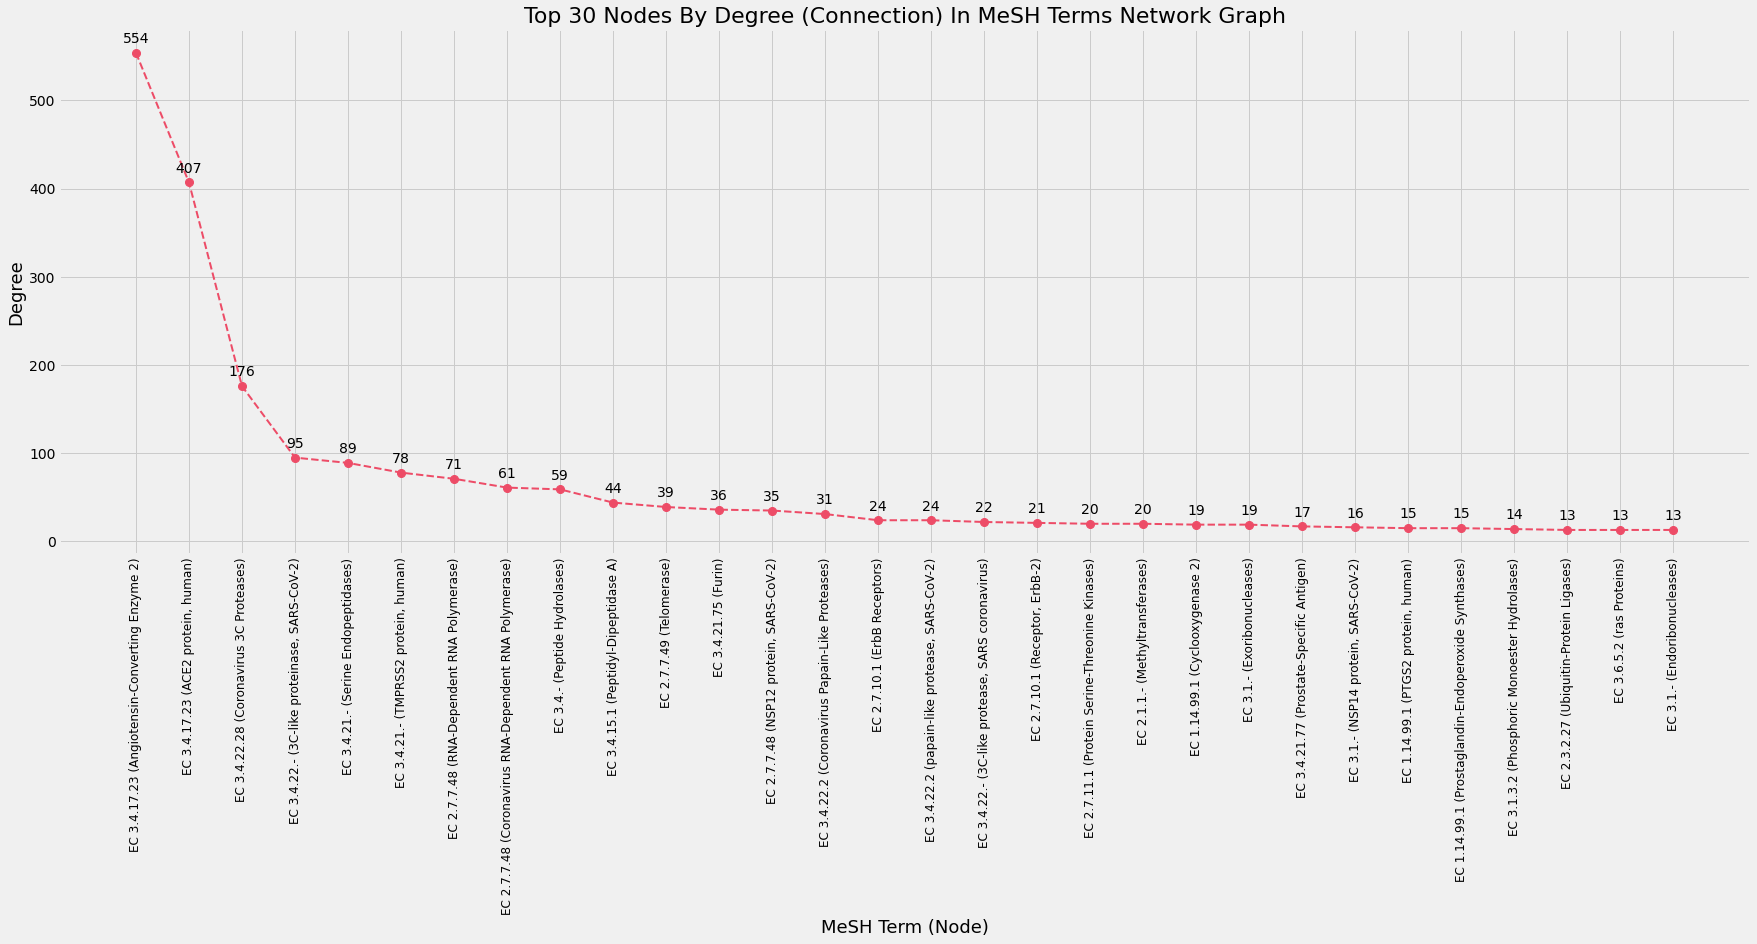

In [ ]:
top = 30
top_nodes = sorted_degree[:top]

mesh_nodes = list()
degrees = list()

for mesh_node, degree in top_nodes:
  mesh_nodes.append(mesh_node)
  degrees.append(degree)

plt.style.use('fivethirtyeight')

title_ = f"Top {top} Nodes By Degree (Connection) In MeSH Terms Network Graph"

plt.rcParams['figure.figsize'] = [27, 9]

plt.xticks(rotation=90)

plt.plot(mesh_nodes, degrees, color='#ED4C67', 
         marker='o', linestyle='dashed', 
         linewidth=2, markersize=8)

#plt.suptitle(f"Based on {mesh_entries} Sars CoV-2 PubMed Articles Meta-data", fontsize=14)

plt.title(title_, fontsize=22)

plt.xticks(fontsize=12) 

plt.xlabel('MeSH Term (Node)', fontsize=18)

plt.ylabel('Degree', fontsize=18)


for x,y in zip(mesh_nodes, degrees):

    label = ("{:,}".format(y))

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

## Vis Net

In [ ]:
from pyvis.network import Network

MKGraph = Network(height='700px', width='81%', bgcolor='#222222', font_color='#ecf0f1')

In [ ]:
for record in cancer_data:
  substances = record.get('RN', "NONE")
  if substances != "NONE":
    for molecule in substances:
      if molecule.startswith('EC'):
        # Primary PMID node
        main_node = str(record.get('PMID', "NONE")).strip()
        MKGraph.add_node(main_node, size=35, title=record.get('TI'), color="#ef5777")
      # Secondary Enzyme node
        MKGraph.add_node(molecule, size=25, color="#ef5777")
        MKGraph.add_edge(main_node, molecule)

for record in sarscov_data:
  substances = record.get('RN', "NONE")
  if substances != "NONE":
    for molecule in substances:
      if molecule.startswith('EC'):
        # Primary PMID node
        main_node = str(record.get('PMID', "NONE")).strip()
        MKGraph.add_node(main_node, size=35, title=record.get('TI'), color="#4bcffa")
      # Secondary Enzyme node
        MKGraph.add_node(molecule, size=25, color="#4bcffa")
        MKGraph.add_edge(main_node, molecule)

In [ ]:
MKGraph.set_options("""
var options = {
"edges": {
    "arrows": {
    "to": {
        "enabled": true,
        "scaleFactor": 0.5
    }
    },
    "color": {
    "inherit": true
    },
    "smooth": {
    "forceDirection": "none"
    }
},
"physics": {
    "barnesHut": {
    "gravitationalConstant": -17350,
    "springLength": 210,
    "springConstant": 0.055,
    "avoidOverlap": 0.53
    },
    "minVelocity": 0.75
}
}
""")

In [ ]:
MKGraph.write_html("bi_enzyme_graph.html")

In [ ]:
nx.write_graphml_lxml(G, "10k-covid-cancer-enzymes.graphml")

In [ ]:
endtime = time.time()

In [ ]:
total = (endtime - starttime)/60
total

4.89924145936966